# TESTING MEDIAPIPE POSE 

 Using a detector, the pipeline first locates the person within the frame then predicts the pose landmarks and segmentation mask within the ROI using the ROI-cropped frame as input.

  Note that for video use cases the detector is invoked only as needed, i.e., for the very first frame and when the tracker could no longer identify body pose presence in the previous frame. For other frames the pipeline simply derives the ROI from the previous frame’s pose landmarks. 

  33 pose landmarks OR use segmentation mask (two class segmentation human or background )

## Configuration options 
Treat the input images as a video stream - localiszing pose landmarks so not invoking another detection until it loses track 

Model complexity 

Smooth landmkarks - filters pose landmarks across different input images to reduce jitter. 

Min detection confidence 
Min tracking confidence 





## Output
x and y coords (scaled by image)
z represents the landmark depth with tehdepth at the midpoint of hips being the origin and the smaller the value the closer the landmarks is to camera 

visibility: likelihood of landmark being visible in the image 

Also possible to get real-wrold 3D coordinfates in meters


In [109]:
import numpy as np 
import pandas as pd 

In [110]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

In [2]:
# For static images:
IMAGE_FILES = ["../raw_data/hands.jpeg"]
BG_COLOR = (192, 192, 192) # gray
with mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    min_detection_confidence=0.5) as pose:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    image_height, image_width, _ = image.shape
    # Convert the BGR image to RGB before processing.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if not results.pose_landmarks:
      continue
    print(
        f'Nose coordinates: ('
        f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x }, '
        f'{results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y })'
    )

    annotated_image = image.copy()
    # Draw segmentation on the image.
    # To improve segmentation around boundaries, consider applying a joint
    # bilateral filter to "results.segmentation_mask" with "image".
    condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
    bg_image = np.zeros(image.shape, dtype=np.uint8)
    bg_image[:] = BG_COLOR
    annotated_image = np.where(condition, annotated_image, bg_image)
    # Draw pose landmarks on the image.
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)




NameError: name 'mp_pose' is not defined

In [124]:
from matplotlib import pyplot as plt
results

mediapipe.python.solution_base.SolutionOutputs

In [3]:
results.pose_landmarks.landmark

NameError: name 'results' is not defined

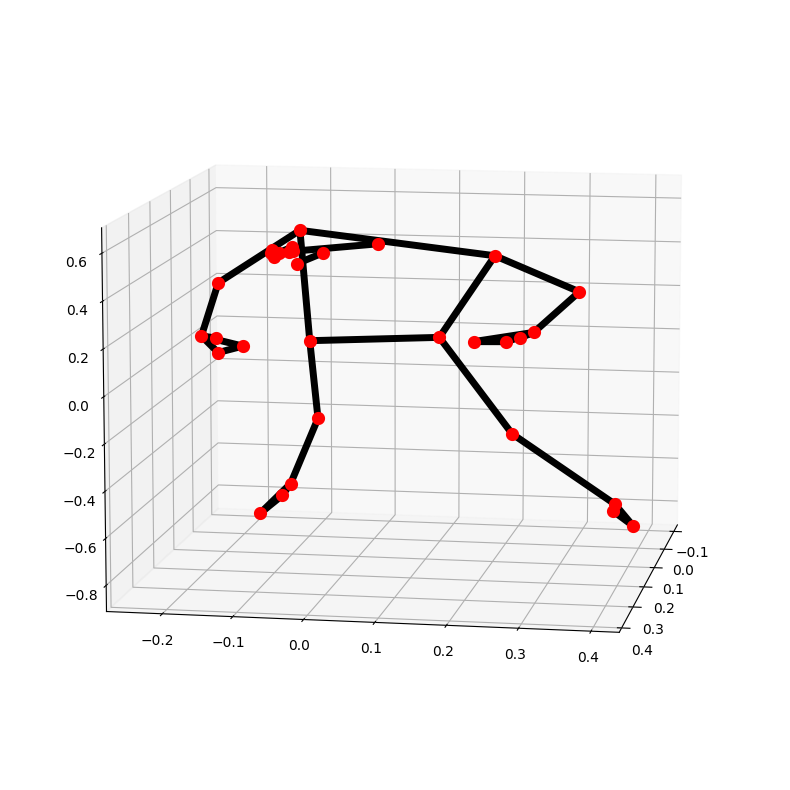

In [125]:
# Plot pose world landmarks.
mp_drawing.plot_landmarks(
    results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

In [126]:
image.shape


(275, 183, 3)

In [127]:
x_coords = []
y_coords = []
z_coords = []
for coords in results.pose_landmarks.landmark:
    coord = str(coords)
    numbs = re.findall(":(.*)", coord)
    x_coords.append(float(numbs[0].strip()))
    y_coords.append(float(numbs[1].strip()))
    z_coords.append(float(numbs[2].strip()))




In [128]:
df = pd.DataFrame({"x":x_coords, "y":y_coords, "z":z_coords})

In [129]:
df["x"]=df["x"]*image.shape[1]
df["y"]=df["y"]*image.shape[0]

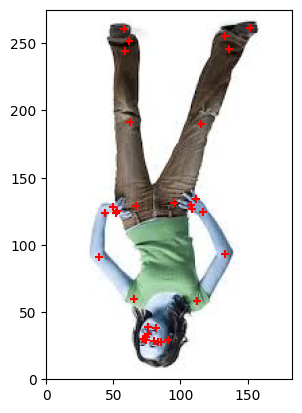

In [130]:
plt.scatter(df["x"], df["y"], color='red', marker='+')
plt.xlim(0,image.shape[1])
plt.ylim(0,image.shape[0])

plt.imshow(image)

In [131]:
import plotly.express as px 

# df=  pd.DataFrame({"x": x_coords,"y": y_coords,"z": z_coords })
# fig = px.scatter(df, x="x", y="y")
# fig.update_layout(scene= 
#                   dict(
#                     xaxis=dict(nticks=21, range=[0,1],),
#                      yaxis = dict(nticks=21, range=[-1,1],))
#                   )
# fig.show()
